In [4]:
!pip install textblob


In [6]:
!pip install wordcloud

In [8]:
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np 
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("data.csv")

In [21]:
df.head(1)

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1347269321148542976,Elon Musk is now the richest person in the wor...,AllotteTV,AllotteTV,2021-01-07T19:50:11.000Z,Thu Jan 07 19:50:11 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,https://www.allottetv.com/2021/01/elon-musk-is...,0,0,NaN,NaN,NaN,NaN,NaN


In [25]:
df1 = df[["Text" , "Tweet Type"]]

In [26]:
df1.head()

,Text,Tweet Type
0,Elon Musk is now the richest person in the wor...,Tweet
1,"RT @business : Elon Musk, the outspoken entrep...",Retweet
2,Elon Musk becoming the richest person on the p...,Tweet
3,"RT @Forbes : No, Elon Musk is not the richest ...",Retweet
4,RT @lexfridman : Elon Musk is now the richest ...,Retweet


In [27]:
# Clean the text 

# Create a function to clean the tweets

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+' , '', text) # Removed @
    text = re.sub(r'#', '', text) #Removed #tags
    text = re.sub(r'RT[\s]+', '', text) #removing RT
    text = re.sub(r'https?:\/\/\s', '', text) #removing hyperlinks
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r'_', '', text) #remoed _
    text = re.sub(r'https', '', text)
    text = re.sub(r't', '', text)
    text = re.sub(r'co', '', text)
    return text

In [28]:
df["Text"] = df["Text"].apply(cleanTxt)

In [29]:
data = pd.DataFrame(df["Text"])
data

,Text
0,Elon Musk is now he riches person in he world ...
1,Elon Musk he ouspoken enrepreneur behind Te...
2,Elon Musk beming he riches person on he plane ...
3,No Elon Musk is no he riches person in he w...
4,Elon Musk is now he riches person in he worl...
...,...
2075,JUST IN Elon Musk jus passed Jeff Bezos as...
2076,Elon Musk Reacs o News ha He s he Riches Perso...
2077,Elon Musk is now he riches person in he worl...
2078,700 years afer Mansa Musa of Mali reigned f...


In [30]:
#Create a function to get the subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 

#Create a function to get the Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity 


#Create two new column 

data["Subjectivity"] = data["Text"].apply(getSubjectivity)
data["Polarity"] = data["Text"].apply(getPolarity)

data.head(15)
    

,Text,Subjectivity,Polarity
0,Elon Musk is now he riches person in he world ...,0.0,0.00
1,Elon Musk he ouspoken enrepreneur behind Te...,0.7,-0.40
2,Elon Musk beming he riches person on he plane ...,0.0,0.00
3,No Elon Musk is no he riches person in he w...,0.0,0.00
4,Elon Musk is now he riches person in he worl...,0.6,0.50
5,TESLA CEO ELON MUSK IS NOW THE RICHEST PERS...,0.0,0.00
6,yPVy7xAVQL CONGRATS MR ELON,0.0,0.00
7,squirrel elon musk has jus beme he riches pe...,0.0,0.00
8,BREAKING Elon Musk has beme he world s rich...,0.0,0.00
9,Elon Musk has edged pas Amazon founder Jeff ...,0.0,0.00


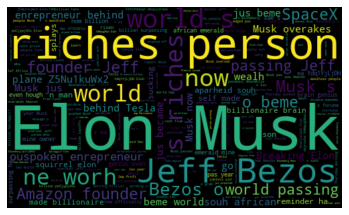

In [31]:
# plot Wordcloud / TextCloud

allwords = ' '.join([twts for twts in data["Text"]])
wordCloud = WordCloud(width= 500, height=300, random_state=21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
# Create a function to compute the Sentiment

def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
data["Analysis"] = data["Polarity"].apply(analysis)
data.head()

,Text,Subjectivity,Polarity,Analysis
0,Elon Musk is now he riches person in he world ...,0.0,0.0,Neutral
1,Elon Musk he ouspoken enrepreneur behind Te...,0.7,-0.4,Negative
2,Elon Musk beming he riches person on he plane ...,0.0,0.0,Neutral
3,No Elon Musk is no he riches person in he w...,0.0,0.0,Neutral
4,Elon Musk is now he riches person in he worl...,0.6,0.5,Positive


In [38]:
#Show the value content

data["Analysis"].value_counts(normalize=True).to_frame().style.format('{:.2%}')

,Analysis
Neutral,60.00%
Positive,26.15%
Negative,13.85%


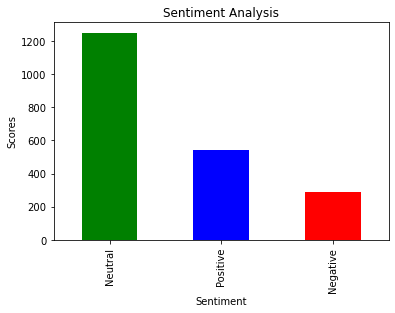

In [35]:
#Plot and visualize the counts
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
data["Analysis"].value_counts().plot(kind="bar", color=['green', 'blue', 'red'])
plt.show()

In [36]:
# Save the final dataset
data.to_csv('ashraful.csv')